In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from scipy.stats import linregress

In [2]:
disasterPath = os.path.join("disaster-data", "disaster_data.xlsx")
disasterData = pd.read_excel(disasterPath, sheet_name="EM-DAT Data")

hdiPath = os.path.join("disaster-data", "hdi_data.csv")
hdiData = pd.read_csv(hdiPath)
hdiData

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.860000,1.880000,1.660000,1.620000,1.660000,1.410000,1.320000,1.380000,1.380000,1.380000
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.090000,4.530000,3.970000,3.590000,2.790000,2.640000,2.280000,2.180000,2.180000,2.180000
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.440000,11.490000,13.140000,12.610000,14.390000,14.460000,12.850000,12.960000,12.960000,12.960000
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.560000,49.680000,55.490000,59.760000,64.950000,75.610000,65.970000,68.950000,68.950000,68.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,NaN,0.664,0.661,0.654,0.652,0.647,...,13.107171,14.172082,14.189127,14.523162,13.791770,13.618078,13.914030,14.087293,14.091826,14.096719
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,NaN,0.633,0.638,0.643,0.648,0.654,...,14.114108,14.493145,14.080904,14.146026,13.325144,13.604555,13.151315,13.296195,13.290914,13.284745
203,ZZI.SA,South Asia,NaN,NaN,NaN,0.442,0.447,0.453,0.457,0.462,...,4.699407,4.584935,4.486500,4.610546,4.624886,4.740263,5.000024,5.110230,5.106447,5.102134
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,NaN,0.407,0.410,0.410,0.411,0.413,...,3.437760,3.530479,3.491150,3.494860,3.415511,3.256156,3.145930,3.151076,3.146092,3.140740


In [20]:
# Clean disaster dataframe to only include type, location, date, and human toll
disasterDataClean = disasterData[["Disaster Group", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", 
    "ISO", "Country", "Subregion", "Region", "Start Year", "Start Month", "Start Day", 
    "Total Deaths", "Total Affected"]]
disasterDataClean

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0
2,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,2000,1.0,NaN,21.0,1200000.0
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,IND,India,Southern Asia,Asia,2023,11.0,26.0,24.0,25.0
9809,Natural,Hydrological,Flood,Flood (General),AUS,Australia,Australia and New Zealand,Oceania,2023,11.0,27.0,NaN,390.0
9810,Natural,Climatological,Drought,Drought,HND,Honduras,Latin America and the Caribbean,Americas,2023,1.0,NaN,NaN,10300.0
9811,Natural,Climatological,Drought,Drought,ESP,Spain,Southern Europe,Europe,2023,NaN,NaN,NaN,NaN


In [21]:
# Create multi index to sort hdi data
yearList = [x for x in range(2000, 2022)]
iterables = [hdiData['iso3'], yearList]
hdiFrame = pd.MultiIndex.from_product(iterables, names=["ISO", "Start Year"])
hdiFrame

MultiIndex([(      'AFG', 2000),
            (      'AFG', 2001),
            (      'AFG', 2002),
            (      'AFG', 2003),
            (      'AFG', 2004),
            (      'AFG', 2005),
            (      'AFG', 2006),
            (      'AFG', 2007),
            (      'AFG', 2008),
            (      'AFG', 2009),
            ...
            ('ZZK.WORLD', 2012),
            ('ZZK.WORLD', 2013),
            ('ZZK.WORLD', 2014),
            ('ZZK.WORLD', 2015),
            ('ZZK.WORLD', 2016),
            ('ZZK.WORLD', 2017),
            ('ZZK.WORLD', 2018),
            ('ZZK.WORLD', 2019),
            ('ZZK.WORLD', 2020),
            ('ZZK.WORLD', 2021)],
           names=['ISO', 'Start Year'], length=4532)

In [22]:
# Create dataframe from multi index
hdiCleanFrame = pd.DataFrame(index=hdiFrame, columns=["hdi", "le", "gnipc", "ihdi", "ineq_le", "ineq_inc"])
hdiCleanFrame

hdi   le gnipc ihdi ineq_le ineq_inc
ISO       Start Year                                      
AFG       2000        NaN  NaN   NaN  NaN     NaN      NaN
          2001        NaN  NaN   NaN  NaN     NaN      NaN
          2002        NaN  NaN   NaN  NaN     NaN      NaN
          2003        NaN  NaN   NaN  NaN     NaN      NaN
          2004        NaN  NaN   NaN  NaN     NaN      NaN
...                   ...  ...   ...  ...     ...      ...
ZZK.WORLD 2017        NaN  NaN   NaN  NaN     NaN      NaN
          2018        NaN  NaN   NaN  NaN     NaN      NaN
          2019        NaN  NaN   NaN  NaN     NaN      NaN
          2020        NaN  NaN   NaN  NaN     NaN      NaN
          2021        NaN  NaN   NaN  NaN     NaN      NaN

[4532 rows x 6 columns]

In [23]:
# Filter hdi data only for 2000 and onward to match range of disaster data
hdiYear = hdiData.filter(regex="[0-2][0-9]$")

# Filter hdi data by index
filterHDI = hdiYear.filter(regex="^hdi.[0-9]", axis=1)
filterLE = hdiYear.filter(regex="^le.[0-9]", axis=1)
filterGNIPC = hdiYear.filter(regex="^gnipc", axis=1)
filterIHDI = hdiYear.filter(regex="^ihdi", axis=1)
filterILE = hdiYear.filter(regex="^ineq_le", axis=1)
filterIINC = hdiYear.filter(regex="^ineq_inc", axis=1)

# Make list of countries and relevant indexes
countryList = list(hdiData["iso3"])
dataList = ["hdi", "le", "gnipc", "ihdi", "ineq_le", "ineq_inc"]


# Creates a list of lists for each countries index measurements from 2000-2021
hdiList = [filterHDI.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterHDI))]
leList = [filterLE.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterLE))]
gnipcList = [filterGNIPC.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterGNIPC))]

# Since inequality data starts in 2010, insert NaN values to the start of each countries list
# This keeps each countries data list the same length, 2000-2021.
nanInsert = [float("NaN") for x in range(0, 10)]
ihdiList = [nanInsert + filterIHDI.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterIHDI))]
ileList = [nanInsert + filterILE.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterILE))]
iincList = [nanInsert + filterIINC.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterIINC))]

# Store all lists together to loop through
totalList = [hdiList, leList, gnipcList, ihdiList, ileList, iincList]

In [24]:
# Loop through each index list, and insert data for each country. 

# Since each data list is formatted by country and then from 2000-2021,
# Insert data by looping through the country list and using .loc

j = 0

for bigList in totalList:
    i = 0
    for smallList in bigList:
        hdiCleanFrame.loc[countryList[i], dataList[j]] = smallList
        i += 1
    j += 1

hdiCleanFrame.reset_index()

,ISO,Start Year,hdi,le,gnipc,ihdi,ineq_le,ineq_inc
0,AFG,2000,0.335,55.2978,984.997434,NaN,NaN,NaN
1,AFG,2001,0.337,55.7981,894.024589,NaN,NaN,NaN
2,AFG,2002,0.362,56.4538,1267.628852,NaN,NaN,NaN
3,AFG,2003,0.376,57.3445,1401.324413,NaN,NaN,NaN
4,AFG,2004,0.392,57.9436,1384.695729,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4527,ZZK.WORLD,2017,0.733,72.568952,16022.41006,0.586,14.382342,23.581983
4528,ZZK.WORLD,2018,0.736,72.816114,16372.22453,0.59,14.041231,23.51146
4529,ZZK.WORLD,2019,0.739,73.012099,16652.53351,0.594,13.736278,23.438998
4530,ZZK.WORLD,2020,0.735,72.257297,15963.88897,0.591,13.38824,23.193448


In [29]:
# Merge hdi data to the disaster data frame so each disaster includes hdi data for it's country
disasterHDIData = pd.merge(disasterDataClean, hdiCleanFrame, how="left", on=["ISO", "Start Year"])
disasterHDIData

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc,ihdi,ineq_le,ineq_inc
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0,0.371,56.9027,1822.11807,NaN,NaN,NaN
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0,0.424,58.3185,3723.241744,NaN,NaN,NaN
2,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,2000,1.0,NaN,21.0,1200000.0,NaN,50.6604,1069.705689,NaN,NaN,NaN
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857,NaN,NaN,NaN
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,IND,India,Southern Asia,Asia,2023,11.0,26.0,24.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
9809,Natural,Hydrological,Flood,Flood (General),AUS,Australia,Australia and New Zealand,Oceania,2023,11.0,27.0,NaN,390.0,NaN,NaN,NaN,NaN,NaN,NaN
9810,Natural,Climatological,Drought,Drought,HND,Honduras,Latin America and the Caribbean,Americas,2023,1.0,NaN,NaN,10300.0,NaN,NaN,NaN,NaN,NaN,NaN
9811,Natural,Climatological,Drought,Drought,ESP,Spain,Southern Europe,Europe,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
hdiBins = []

disasterHDIData[["hdi"]].describe()

,hdi
count,8739.000
unique,631.000
top,0.717
freq,74.000


In [ ]:
disasterHDIData["hdi bins"] = pd.cut(disasterHDIData["hdi"], hdiBins, labels=hdiLabels, include_lowest=True)

In [31]:
# Drop rows with no HDI data and seperate inequality data
disasterHDINA = disasterHDIData.dropna(axis=0, subset=["hdi", "le", "gnipc"])
disasterHDIClean = disasterHDINA.drop(["ihdi", "ineq_le", "ineq_inc"], axis=1)
disasterHDIClean.reset_index()

,index,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc
0,0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0,0.371,56.9027,1822.11807
1,1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0,0.424,58.3185,3723.241744
2,3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857
3,4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767
4,5,Natural,Geophysical,Volcanic activity,Ash fall,GTM,Guatemala,Latin America and the Caribbean,Americas,2000,1.0,16.0,NaN,800.0,0.55,67.4459,6429.056878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,9064,Natural,Climatological,Drought,Drought,SSD,South Sudan,Sub-Saharan Africa,Africa,2021,NaN,NaN,NaN,7723670.0,0.385,54.9752,767.787
8735,9065,Natural,Climatological,Drought,Drought,ZWE,Zimbabwe,Sub-Saharan Africa,Africa,2021,8.0,NaN,NaN,167500.0,0.593,59.2531,3809.887158
8736,9066,Natural,Climatological,Drought,Drought,ZMB,Zambia,Sub-Saharan Africa,Africa,2021,7.0,NaN,NaN,1580000.0,0.565,61.2234,3217.767739
8737,9067,Natural,Climatological,Drought,Drought,USA,United States of America,Northern America,Americas,2021,1.0,1.0,NaN,NaN,0.921,77.1982,64765.21509


In [35]:
# Drop NaN deaths and Total Affected values and copy into seperate dataframes
disasterHDIDeaths = disasterHDIClean.dropna(axis=0, subset=["Total Deaths"])
disasterHDIAffected = disasterHDIClean.dropna(axis=0, subset=["Total Affected"])
disasterHDIAffected.reset_index()
disasterHDIDeaths.reset_index()

,index,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc
0,3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857
1,4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767
2,6,Natural,Meteorological,Storm,Storm (General),IRN,Iran (Islamic Republic of),Southern Asia,Asia,2000,1.0,18.0,3.0,5500.0,0.685,69.6909,10084.59493
3,7,Natural,Hydrological,Flood,Riverine flood,MOZ,Mozambique,Sub-Saharan Africa,Africa,2000,1.0,26.0,800.0,4500000.0,0.303,49.4912,610.655581
4,9,Natural,Hydrological,Flood,Riverine flood,BRA,Brazil,Latin America and the Caribbean,Americas,2000,1.0,1.0,26.0,70000.0,0.679,69.7367,11279.41358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,9047,Natural,Hydrological,Flood,Flood (General),BOL,Bolivia (Plurinational State of),Latin America and the Caribbean,Americas,2021,12.0,18.0,15.0,60000.0,0.692,63.6304,8111.190194
6240,9048,Natural,Hydrological,Flood,Flood (General),IDN,Indonesia,South-eastern Asia,Asia,2021,12.0,31.0,2.0,27500.0,0.705,67.5703,11466.06836
6241,9049,Natural,Hydrological,Flood,Flood (General),STP,Sao Tome and Principe,Sub-Saharan Africa,Africa,2021,12.0,27.0,8.0,219668.0,0.618,67.5912,4021.350815
6242,9050,Natural,Hydrological,Flood,Flood (General),PAK,Pakistan,Southern Asia,Asia,2021,7.0,1.0,194.0,NaN,0.544,66.0979,4623.70543


In [36]:
# Drop rows with no inequality data and drop NaN death and affected values
disasterIneqClean = disasterHDINA.dropna(axis=0, subset=["ihdi", "ineq_le", "ineq_inc"])
disasterIneqDeaths = disasterIneqClean.dropna(axis=0, subset=["Total Affected"])
disasterIneqAffected = disasterIneqClean.dropna(axis=0, subset=["Total Affected"])
disasterIneqDeaths.reset_index()
disasterIneqAffected.reset_index()

,index,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc,ihdi,ineq_le,ineq_inc
0,4466,Natural,Geophysical,Earthquake,Ground movement,SLB,Solomon Islands,Melanesia,Oceania,2010,1.0,3.0,NaN,1126.0,0.55,68.7318,2314.734737,0.43,15.577661,26.315
1,4467,Natural,Hydrological,Flood,Riverine flood,BDI,Burundi,Sub-Saharan Africa,Africa,2010,1.0,NaN,NaN,1000.0,0.405,57.0809,841.740015,0.28,35.464851,13.24395
2,4468,Natural,Hydrological,Mass movement (wet),Landslide (wet),PAK,Pakistan,Southern Asia,Asia,2010,1.0,4.0,19.0,26700.0,0.505,64.4361,3835.512924,0.347,33.227146,11.135
3,4469,Natural,Geophysical,Earthquake,Ground movement,HTI,Haiti,Latin America and the Caribbean,Americas,2010,1.0,12.0,222570.0,3700000.0,0.433,46.0185,2905.829348,0.242,43.574493,47.863
4,4471,Natural,Hydrological,Flood,Flash flood,PHL,Philippines,South-eastern Asia,Asia,2010,1.0,14.0,2.0,40198.0,0.674,70.7542,6600.766809,0.536,16.81089,29.98014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,9061,Natural,Climatological,Drought,Drought,IRQ,Iraq,Western Asia,Asia,2021,1.0,NaN,NaN,7000000.0,0.686,70.3779,9977.249073,0.554,13.982015,12.67895
3235,9064,Natural,Climatological,Drought,Drought,SSD,South Sudan,Sub-Saharan Africa,Africa,2021,NaN,NaN,NaN,7723670.0,0.385,54.9752,767.787,0.245,36.974091,32.25296
3236,9065,Natural,Climatological,Drought,Drought,ZWE,Zimbabwe,Sub-Saharan Africa,Africa,2021,8.0,NaN,NaN,167500.0,0.593,59.2531,3809.887158,0.458,24.038509,28.76901
3237,9066,Natural,Climatological,Drought,Drought,ZMB,Zambia,Sub-Saharan Africa,Africa,2021,7.0,NaN,NaN,1580000.0,0.565,61.2234,3217.767739,0.39,25.052994,44.84022


### Analysis


In [82]:
# 

def outliers(df):
    iqr = df.quantile(0.75) - df.quantile(0.25)
    return [df.quantile(0.25) - (1.5 * iqr), df.quantile(0.75) + (1.5 * iqr)]

outliers(disasterHDIDeaths["Total Deaths"])
disasterHDIAffected[["Total Affected"]].describe()

,Total Affected
count,7.051000e+03
mean,5.949754e+05
std,6.801064e+06
min,1.000000e+00
25%,6.000000e+02
50%,5.136000e+03
75%,5.000000e+04
max,3.300000e+08


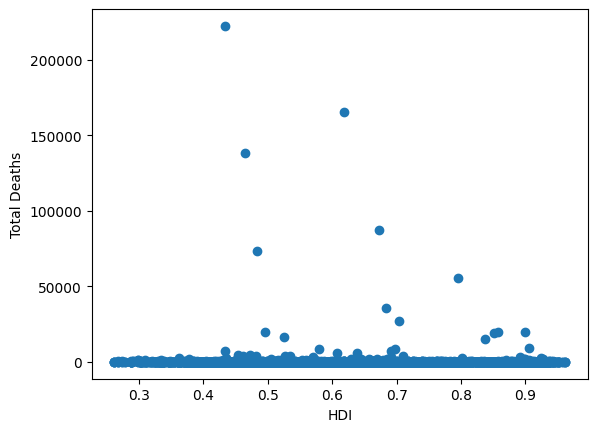

In [66]:
plt.scatter(disasterHDIDeaths["hdi"], disasterHDIDeaths["Total Deaths"])
plt.xlabel("HDI")
plt.ylabel("Total Deaths")
plt.show()

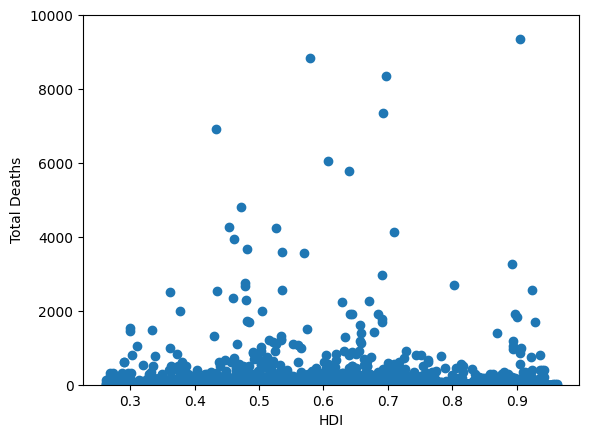

In [72]:
plt.scatter(disasterHDIDeaths["hdi"], disasterHDIDeaths["Total Deaths"])
plt.ylim(0, 10000)
plt.xlabel("HDI")
plt.ylabel("Total Deaths")
plt.show()

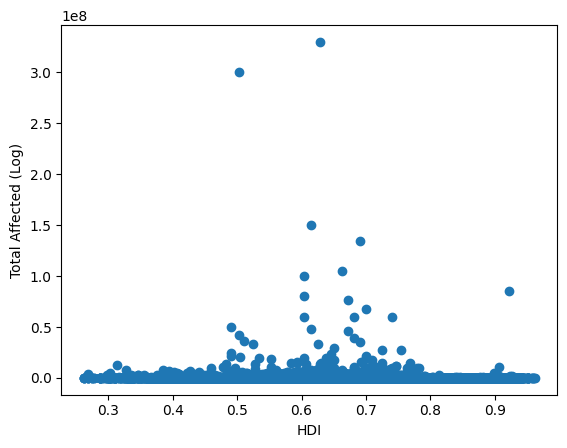

In [78]:
plt.scatter(disasterHDIAffected["hdi"], disasterHDIAffected["Total Affected"])
plt.xlabel("HDI")
plt.ylabel("Total Affected (Log)")
plt.show()

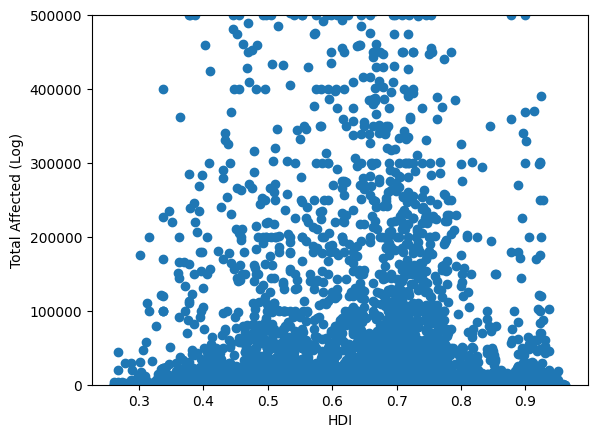

In [75]:
plt.scatter(disasterHDIAffected["hdi"], disasterHDIAffected["Total Affected"])
plt.ylim(0, 500000)
plt.xlabel("HDI")
plt.ylabel("Total Affected (Log)")
plt.show()